# MySQL

## Введение

SQL = Structured Query Language = структурированный язык запросов

API = Application Programming Interface = интерфейс взаимодействия с БД

БД = База Данных

СУБД = Система Управления БД

Правила этикета SQL: https://www.sqlstyle.guide/ru/

реформатирование SQL кода: https://codebeautify.org/sqlformatter

Этапы поиска частых ошибок 

1. Приведите синтаксис запроса к общепринятому
2. Проверьте, что ключевые слова, названия столбцов и значения в ячейках, которые необходимо найти, написаны правильно.
Особенно обратите внимание, чтобы в русских названиях столбцов не было английских букв.
3. Проверьте, что:
    количество открывающихся скобок равно количеству закрывающихся;
    запятые разделяют перечисление столбцов, но не ключевые слова;
    запросы разделяются точкой с запятой.
4. Проверьте, что последовательность команд указана верно:
    SELECT 'столбцы или * для выбора всех столбцов; обязательно'
    FROM 'таблица; обязательно'
    WHERE 'условие/фильтрация, например, city = 'Moscow'; необязательно'
    GROUP BY 'столбец, по которому хотим сгруппировать данные; необязательно'
    HAVING 'условие/фильтрация на уровне сгруппированных данных; необязательно'
    ORDER BY 'столбец, по которому хотим отсортировать вывод; необязательно'
5.  Если запрос включает подзапросы, выполните сначала подзапросы и удостоверьтесь, что получаете ожидаемый результат.
6. Прочитайте комментарии под заданием: большинство трудностей уже обсуждалось не один раз.


## Основные понятия

Основные понятия реляционных баз данных

Реляционная модель была разработана в конце 1960-х годов Е.Ф.Коддом . Она определяет способ представления данных (структуру данных), методы защиты данных (целостность данных), и операции, которые можно выполнять с данными (манипулирование данными). Эта модель лежит в основе всех реляционных баз данных до настоящего времени.

Основные принципы реляционных баз данных:

- все данные на концептуальном уровне представляются в виде объектов, заданных в виде строк и столбцов, называемых отношением, более распространенное название – таблица;
- в пересечение строки и столбца таблицы можно занести только одно значение;
- все операции выполняются над целыми отношениями и результатом этих операций является отношение.

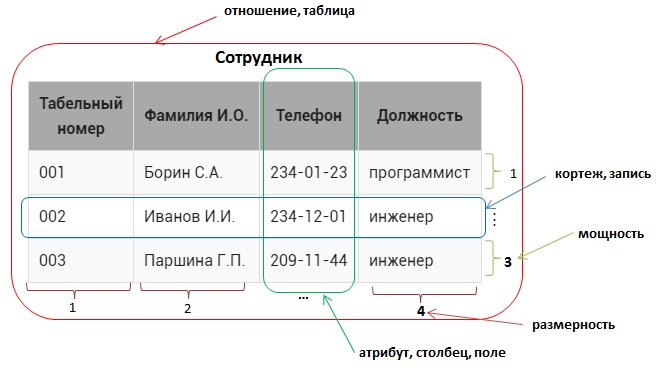

На примере таблицы Сотрудник рассмотрим терминологию реляционных баз данных:

- отношение  – это структура данных целиком, набор записей (в обычном понимании – таблица) , в  примере –это Сотрудник;
- кортеж – это каждая строка , содержащая данные (более распространенный термин – запись ), например, <001, Борин С.А, 234-01-23, программист>, все кортежи в отношении должны быть различны;
- мощность – число кортежей в таблице (проще говоря, число записей), в данном случае 3, мощность отношения может быть любой (от 0 до бесконечности), порядок следования кортежей - неважен;
- атрибут – это столбец в таблице (более распространенный термин – поле ), в примере – Табельный номер, Фамилия И.О., Телефон, Должность) 
- размерность – это число атрибутов в таблице, в данном случае – 4;
размерность отношения должна быть больше 0, порядок следования атрибутов существенен;
- домен атрибута – это допустимые значения (неповторяющиеся), которые можно занести в поле , например для атрибута Должность домен – {инженер, программист}.

## Основные типы данных SQL

1. INT,INTEGER	

Целое число, могут принимать значения от -2 147 483 648 до 2 147 483 647
	
(-567, 1205, ...)

2. DECIMAL, NUMERIC	

Вещественное число, в скобках указывается максимальная длина числа 
(включает символы слева и справа от десятичной запятой)
и количество знаков после запятой.
Можно использовать оба этих типа, они эквивалентны,
принимают значения в диапазоне -10e38+1 до 10e38-1.

DECIMAL(4,1), NUMERIC(6,3) => (34.6, -3.294, ...)

3. DATE

Дата в формате ГГГГ-ММ-ДД 

(2020-07-26, 2021-01-03, ...)

4. VARCHAR

Строка длиной не более 255 символов,
в скобках указывается максимальная
длина строки, которая может храниться в поле
VARCHAR(10). 
(Рассматриваются однобайтовые кодировки,
для которых число в скобках соответствует максимальному
количеству символов в строке)

(пример, описание, ...)

Рекомендации по выбору типов данных для полей таблицы.

- Выбирайте минимальный тип данных исходя из максимального значения поля. Например, если максимальный текст, который может быть записан в поле, имеет длину 25 символов, значит нужно использовать тип VARCHAR(25).

- Для описания ключевого поля используйте описание INT PRIMARY KEY AUTO_INCREMENT. Это значит, что в поле будут заноситься различные целые числа, при этом они будут автоматически генерироваться (каждая следующая строка будет иметь значение ключа на 1 больше предыдущего).

## Создание таблицы

Для создания таблицы используется SQL-запрос. В нем указывается какая таблица создается, из каких атрибутов(полей) она состоит и какой тип данных имеет каждое поле, при необходимости указывается описание полей (ключевое поле и т.д.). Его структура :

1) ключевые слова : CREATE TABLE
2) имя создаваемой таблицы;
3) открывающая круглая скобка «(»;
4) название поля и его описание, которое включает тип поля и другие необязательные характеристики;
запятая;
5) название поля и его описание;
6) ...
7) закрывающая скобка «)».

Рекомендации по записи SQL запроса

- Ключевые слова: SQL не является регистрозависимым языком (CREATE и create - одно и тоже ключевое слово). 
- Ключевые слова SQL и типы данных рекомендуется  записывать прописными (большими) буквами.
- Имена таблиц и полей - строчными (маленькими) буквами.
- SQL-запрос можно писать на нескольких строках.
- В конце SQL-запроса ставится точка с запятой (хотя если Вы пишете один запрос, это необязательно).

In [55]:
'''
CREATE TABLE IF NOT EXISTS book (
book_id INT PRIMARY KEY AUTO_INCREMENT,
title VARCHAR(50),
author VARCHAR(30),
price DECIMAL(8,2),
amount INT
)
'''

'\nCREATE TABLE IF NOT EXISTS book (\nbook_id INT PRIMARY KEY AUTO_INCREMENT,\ntitle VARCHAR(50),\nauthor VARCHAR(30),\nprice DECIMAL(8,2),\namount INT\n)\n'

## Вставка записи в таблицу

Для занесения новой записи в таблицу используется SQL запрос, в котором указывается в какую таблицу, в какие поля заносить новые значения. Структура запроса:

1) ключевые слова INSERT INTO (ключевое слово INTO можно пропустить);
2) имя таблицы, в которую добавляется запись;
3) открывающая круглая скобка «(»;
4) список полей через запятую, в которые следует занести новые данные;
5) закрывающая скобка «)»;
6) ключевое слово VALUES;
7) открывающая круглая скобка «(»;
8) список значений через запятую, которые заносятся в соответствующие поля, при этом текстовые значения заключаются в кавычки, числовые значения записываются без кавычек, в качестве разделителя целой и дробной части используется точка;
9) закрывающая скобка «)».

При составлении списка полей и списка значений необходимо учитывать следующее:

- количество полей и количество значений в списках должны совпадать;
- должно существовать прямое соответствие между позицией одного и того же элемента в обоих списках, поэтому первый элемент списка значений должен относиться к первому столбцу в списке столбцов, второй – ко второму столбцу и т.д.;
- типы данных элементов в списке значений должны быть совместимы с типами данных соответствующих столбцов таблицы ( целое число можно занести в поле типа DECIMAL, обратная операция - недопустима);
- новые значения нельзя добавлять в поля, описанные как PRIMARY KEY AUTO_INCREMENT;
- рекомендуется заполнять все поля записи, если же поле пропущено, значение этого поля зависит от установленных по умолчанию значений, если значения не установлены - на данной платформе вставляется пустое значение (NULL).

Занесите записи в таблицу book:

In [56]:
'''
INSERT INTO book VALUES (1, "Мастер и Маргарита", "Булгаков М.А.", 670.99, 3);
INSERT INTO book VALUES (2, "Белая гвардия", "Булгаков М.А.", 540.50, 5);
INSERT INTO book VALUES (3, "Идиот", "Достоевский Ф.М.", 460.00, 10);
INSERT INTO book VALUES (4, "Братья Карамазовы", "Достоевский Ф.М.", 799.01, 2)
'''

'\nINSERT INTO book VALUES (1, "Мастер и Маргарита", "Булгаков М.А.", 670.99, 3)\n'

Для занесения пустых значений в поля используется оператор Null.

В таблицу fine первые 5 строк уже занесены. Добавить в таблицу записи с ключевыми значениями 6, 7, 8.

In [25]:
'''
INSERT INTO fine VALUES (Null, "Баранов П.Е.", "Р523ВТ", 
                         "Превышение скорости(от 40 до 60)", 
                         Null,
                         "2020-02-14", Null);
INSERT INTO fine VALUES (Null, "Абрамова К.А.", "О111АВ", 
                         "Проезд на запрещающий сигнал", 
                         Null,
                         "2020-02-23", Null);
INSERT INTO fine VALUES (Null, "Яковлев Г.Р.", "Т330ТТ", 
                         "Проезд на запрещающий сигнал", 
                         Null,
                         "2020-03-03", Null);  
'''

'\nINSERT INTO fine VALUES (Null, "Баранов П.Е.", "Р523ВТ", \n                         "Превышение скорости(от 40 до 60)", \n                         Null,\n                         "2020-02-14", Null);\nINSERT INTO fine VALUES (Null, "Абрамова К.А.", "О111АВ", \n                         "Проезд на запрещающий сигнал", \n                         Null,\n                         "2020-02-23", Null);\nINSERT INTO fine VALUES (Null, "Яковлев Г.Р.", "Т330ТТ", \n                         "Проезд на запрещающий сигнал", \n                         Null,\n                         "2020-03-03", Null);  \n'

## Выборка всех данных из таблицы

Для того чтобы отобрать все данные из таблицы используется SQL запрос следующей структуры: 

1) ключевое слово SELECT; 
2) символ « *» ; 
3) ключевое слово FROM; 
4) имя таблицы.

Результатом является таблица, в которую включены все строки и столбцы указанной в запросе таблицы.

Вывести информацию о всех книгах, хранящихся на складе.

In [82]:
'''
SELECT * FROM book;
'''

'\nSELECT * FROM book;\n'

## Выборка отдельных столбцов

Для того чтобы отобрать данные из определенных столбцов таблицы используется SQL запрос следующей структуры: 

1) ключевое слово SELECT ; 
2) список столбцов таблицы через запятую; 
3) ключевое слово FROM ; 
4) имя таблицы.

Результатом является таблица, в которую включены все данные из указанных после SELECT столбцов исходной таблицы.

Выбрать авторов, название книг и их цену из таблицы book.

In [83]:
'''
SELECT author, title, price FROM book;
'''

'\nSELECT author, title, price FROM book;\n'

## Присвоение новых имен столбцам при формировании выборки

Для того чтобы отобрать данные из определенных столбцов таблицы и одновременно задать столбцам новые названия в результате выборки используется SQL запрос следующей структуры: 

1) ключевое слово SELECT ; 
2) имя столбца;
3) ключевое слово AS ; 
4) новое название столбца (можно русскими буквами), выводимое в результате запроса, но это должно быть одно слово, если название состоит из двух слов – соединяйте их подчеркиванием, например, Количество_книг; 
5) запятая; 
6) имя столбца; 
7) .... 
8) ключевое слово FROM ; 
9) имя таблицы.

В одном запросе можно использовать и имена столбцов из таблицы, и новые названия.

Результатом является таблица, в которую включены все данные из указанных после SELECT столбцов исходной таблицы. Каждому столбцу в результате запроса присваивается новое имя, заданное после AS, или столбец получает имя столбца исходной таблицы, если AS отсутствует.

Выбрать названия книг и авторов из таблицы book, для поля title задать имя(псевдоним) Название, для поля author –  Автор. 

In [84]:
'''
SELECT title AS Название, author AS Автор FROM book;
'''

'\nSELECT title AS Название, author AS Автор FROM book;\n'

## Выборка данных с созданием вычисляемого столбца

С помощью SQL запросов можно осуществлять вычисления по каждой строке таблицы с помощью вычисляемого столбца. Для него в списке полей после оператора SELECT указывается выражение и задается имя.

Выражение может включать имена столбцов, константы, знаки операций, встроенные функции.

Результатом является таблица, в которую включены все данные из указанных после SELECT столбцов, а также новый столбец, в каждой строке которого вычисляется заданное выражение.

Для упаковки каждой книги требуется один лист бумаги, цена которого 1 рубль 65 копеек. Посчитать стоимость упаковки для каждой книги (сколько денег потребуется, чтобы упаковать все экземпляры книги). В запросе вывести название книги, ее количество и стоимость упаковки, последний столбец назвать pack.

In [85]:
'''
SELECT title, amount, amount * 1.65 AS pack FROM book;
'''

'\nSELECT title, amount, amount * 1.65 AS pack FROM book;\n'

## Выборка данных, вычисляемые столбцы, математические функции

- CEILING(x)	

возвращает наименьшее целое число, большее или равное x. 
(округляет до целого числа в большую сторону)	

CEILING(4.2)=5, CEILING(-5.8)=-5

- ROUND(x, k)	

округляет значение x до k знаков после запятой,
если k не указано – x округляется до целого

ROUND(4.361)=4, ROUND(5.86592,1)=5.9

- FLOOR(x)	

возвращает наибольшее целое число, меньшее или равное x.
(округляет до целого числа в меньшую сторону)	

FLOOR(4.2)=4, FLOOR(-5.8)=-6

-POWER(x, y)	

возведение x в степень y.	

POWER(3,4)=81.0

- SQRT(x)	

квадратный корень из x	

SQRT(4)=2.0, SQRT(2)=1.41...

- DEGREES(x)	

конвертирует значение x из радиан в градусы	

DEGREES(3) = 171.8...

- RADIANS(x)	

конвертирует значение x из градусов в радианы	

RADIANS(180)=3.14...

- ABS(x)	

модуль числа x	

ABS(-1) = 1, ABS(1) = 1

- PI() = 3.1415926...	 

В конце года цену всех книг на складе пересчитывают – снижают ее на 30%. Написать SQL запрос, который из таблицы book выбирает названия, авторов, количества и вычисляет новые цены книг. Столбец с новой ценой назвать new_price, цену округлить до 2-х знаков после запятой.

In [86]:
'''
SELECT title, author, amount, ROUND(price * 0.7, 2) AS new_price FROM book
'''

'\nSELECT title, author, amount, ROUND(price * 0.7, 2) AS new_price FROM book\n'

## Выборка данных, вычисляемые столбцы, логические функции

В SQL реализована возможность заносить в поле значение в зависимости от условия. 
Для этого используется функция IF():

IF(логическое_выражение, выражение_1, выражение_2)

Функция вычисляет логическое_выражение, если оно истина – в поле заносится значение выражения_1, в противном случае –  значение выражения_2. Все три параметра IF() являются обязательными.

Допускается использование вложенных функций, вместо выражения_1 или выражения_2 может стоять новая функция IF.

При анализе продаж книг выяснилось, что наибольшей популярностью пользуются книги Михаила Булгакова, на втором месте книги Сергея Есенина. Исходя из этого решили поднять цену книг Булгакова на 10%, а цену книг Есенина - на 5%. Написать запрос, куда включить автора, название книги и новую цену, последний столбец назвать new_price. Значение округлить до двух знаков после запятой.

In [87]:
'''
SELECT author, title, 
ROUND(IF(author = "Булгаков М.А.", price * 1.1, IF(author = "Есенин С.А.", price * 1.05, price)), 2) AS new_price 
FROM book
'''

'\nSELECT author, title, \nROUND(IF(author = "Булгаков М.А.", price * 1.1, IF(author = "Есенин С.А.", price * 1.05, price)), 2) AS new_price \nFROM book\n'

## Выборка данных по условию

С помощью запросов можно включать в итоговую выборку не все строки исходной таблицы, а только те, которые отвечают некоторому условию. Для этого после указания таблицы, откуда выбираются данные, задается ключевое слово WHERE и логическое выражение, от результата которого зависит будет ли включена строка в выборку или нет. Если условие – истина, то строка(запись)  включается в выборку, если ложь – нет.

Логическое выражение может включать операторы сравнения (равно «=», не равно «<>», больше «>», меньше «<», больше или равно«>=», меньше или равно «<=») и выражения, допустимые в SQL.

Вывести автора, название  и цены тех книг, количество которых меньше 10.

In [88]:
'''
SELECT author, title, price FROM book
WHERE amount < 10
'''

'\nSELECT author, title, price FROM book\nWHERE amount < 10\n'

## Выборка данных, логические операции

Логическое выражение после ключевого слова WHERE кроме операторов сравнения  и выражений может включать  логические операции (И «and», ИЛИ «or», НЕ «not») и круглые скобки, изменяющие приоритеты выполнения операций.

Приоритеты операций:

1) круглые скобки
2) умножение  (*),  деление (/)
3) сложение  (+), вычитание (-)
4) операторы сравнения (=, >, <, >=, <=, <>)
5) NOT
6) AND
7) OR

Вывести название, автора,  цену  и количество всех книг, цена которых меньше 500 или больше 600, а стоимость всех экземпляров этих книг больше или равна 5000.

In [89]:
'''
SELECT title, author, price, amount FROM book
WHERE (price < 500 OR price > 600) AND price*amount >= 5000
'''

'\nSELECT title, author, price, amount FROM book\nWHERE (price < 500 OR price > 600) AND price*amount >= 5000\n'

## Выборка данных, операторы BETWEEN, IN

Логическое выражение после ключевого слова WHERE может включать операторы  BETWEEN и IN. Приоритет  у этих операторов такой же как у операторов сравнения, то есть они выполняются раньше, чем NOT, AND, OR.

Оператор BETWEEN позволяет отобрать данные, относящиеся к некоторому интервалу, включая его границы.

Вывести название и авторов тех книг, цены которых принадлежат интервалу от 540.50 до 800 (включая границы),  а количество или 2, или 3, или 5, или 7 .

In [90]:
'''
SELECT title, author FROM book 
WHERE price BETWEEN 540.50 AND 800 AND amount IN (2, 3, 5, 7)
'''

'\nSELECT title, author FROM book \nWHERE price BETWEEN 540.50 AND 800 AND amount IN (2, 3, 5, 7)\n'

## Выборка данных с сортировкой

При выборке можно указывать столбец или несколько столбцов, по которым необходимо отсортировать отобранные строки. Для этого используются ключевые слова ORDER BY, после которых задаются имена столбцов. При этом строки сортируются по первому столбцу, если указан второй столбец, сортировка осуществляется только для тех строк, у которых значения первого столбца одинаковы. По умолчанию ORDER BY выполняет сортировку по возрастанию. Чтобы управлять направлением сортировки вручную, после имени столбца указывается ключевое слово ASC (по возрастанию) или DESC (по убыванию). 

Столбцы после ключевого слова ORDER BY можно задавать:

- названием столбца;
- номером столбца;
- именем столбца (указанным после AS).

Вывести  автора и название  книг, количество которых принадлежит интервалу от 2 до 14 (включая границы). Информацию  отсортировать сначала по авторам (в обратном алфавитном порядке), а затем по названиям книг (по алфавиту).

In [91]:
'''
SELECT author, title FROM book
WHERE amount BETWEEN 2 AND 14
ORDER BY author DESC, title ASC
'''

'\nSELECT author, title FROM book\nWHERE amount BETWEEN 2 AND 14\nORDER BY author DESC, title ASC\n'

## Выборка данных, оператор LIKE

Оператор LIKE используется для сравнения строк. В отличие от операторов отношения равно (=) и не равно (<>), LIKE позволяет сравнивать строки не на полное совпадение (не совпадение), а в соответствии с шаблоном. Шаблон может включать обычные символы и символы-шаблоны. При сравнении с шаблоном, его обычные символы должны в точности совпадать с символами, указанными в строке. Символы-шаблоны могут совпадать с произвольными элементами символьной строки.

- %	

Любая строка, содержащая ноль или более символов	

SELECT * FROM book WHERE author LIKE '%М.%'

выполняет поиск и выдает все книги, инициалы авторов которых содержат «М.»

- _ (нижнее подчеркивание)	

Любой одиночный символ	

SELECT * FROM book WHERE title LIKE 'Поэм_'

выполняет поиск и выдает все книги, названия которых либо «Поэма», либо «Поэмы» и пр.

Вывести названия книг, начинающихся с буквы «Б».

In [92]:
'''
SELECT title 
FROM book
WHERE title LIKE 'Б%';
/* эквивалентное условие 
title LIKE 'б%'
*/
'''

"\nSELECT title \nFROM book\nWHERE title LIKE 'Б%';\n/* эквивалентное условие \ntitle LIKE 'б%'\n*/\n"

Вывести название книг, состоящих ровно из 5 букв

In [94]:
'''
SELECT title FROM book 
WHERE title LIKE "_____"
'''

'\nSELECT title FROM book \nWHERE title LIKE "_____"\n'

Вывести книги, название которых длиннее 5 символов:

In [95]:
'''
SELECT title FROM book 
WHERE title LIKE "______%";
/* эквивалентные условия 
title LIKE "%______"
title LIKE "%______%"
*/
'''

'\nSELECT title FROM book \nWHERE title LIKE "______%";\n/* эквивалентные условия \ntitle LIKE "%______"\ntitle LIKE "%______%"\n*/\n'

Вывести названия книг, которые содержат букву "и" как отдельное слово, если считать, что слова в названии отделяются друг от друга пробелами и не содержат знаков препинания.

In [96]:
'''
SELECT title FROM book 
WHERE   title LIKE "_% и _%" /*отбирает слово И внутри названия */
    OR title LIKE "и _%" /*отбирает слово И в начале названия */
    OR title LIKE "_% и" /*отбирает слово И в конце названия */
    OR title LIKE "и" /* отбирает название, состоящее из одного слова И */
'''

'\nSELECT title FROM book \nWHERE   title LIKE "_% и _%" /*отбирает слово И внутри названия */\n    OR title LIKE "и _%" /*отбирает слово И в начале названия */\n    OR title LIKE "_% и" /*отбирает слово И в конце названия */\n    OR title LIKE "и" /* отбирает название, состоящее из одного слова И */\n'

Вывести названия книг, которые состоят ровно из одного слова, если считать, что слова в названии отделяются друг от друга пробелами .

In [97]:
'''
SELECT title FROM book 
WHERE title NOT LIKE "% %";
'''

'\nSELECT title FROM book \nWHERE title NOT LIKE "% %";\n'

Вывести название и автора тех книг, название которых состоит из двух и более слов, а инициалы автора содержат букву «С». Считать, что в названии слова отделяются друг от друга пробелами и не содержат знаков препинания, между фамилией автора и инициалами обязателен пробел, инициалы записываются без пробела в формате: буква, точка, буква, точка. Информацию отсортировать по названию книги в алфавитном порядке.

In [98]:
'''
SELECT title, author FROM book
WHERE title LIKE "% %" AND title NOT LIKE " " AND author LIKE "%С.%"
ORDER BY title ASC
'''

'\nSELECT title, author FROM book\nWHERE title LIKE "% %" AND title NOT LIKE " " AND author LIKE "%С.%"\nORDER BY title ASC\n'

Вывести из таблицы trip информацию о командировках тех сотрудников, фамилия которых заканчивается на букву «а», в отсортированном по убыванию даты последнего дня командировки виде. В результат включить столбцы name, city, per_diem, date_first, date_last.

In [18]:
'''
SELECT name, city, per_diem, date_first, date_last FROM trip
WHERE name LIKE "%а %"
ORDER BY date_last DESC
'''

'\nSELECT name, city, per_diem, date_first, date_last FROM trip\nWHERE name LIKE "%а %"\nORDER BY date_last DESC\n'

Вывести в алфавитном порядке фамилии и инициалы тех сотрудников, которые были в командировке в Москве.

In [19]:
'''
SELECT DISTINCT name FROM trip
WHERE city = "Москва"
ORDER BY name ASC
'''

'\nSELECT DISTINCT name FROM trip\nWHERE city = "Москва"\nORDER BY name ASC\n'

Для каждого города посчитать, сколько раз сотрудники в нем были.  Информацию вывести в отсортированном в алфавитном порядке по названию городов. Вычисляемый столбец назвать Количество. 

In [20]:
'''
SELECT city, COUNT(city) AS Количество FROM trip
GROUP BY city
ORDER BY city ASC
'''

'\nSELECT city, COUNT(city) AS Количество FROM trip\nGROUP BY city\nORDER BY city ASC\n'

## Выбор уникальных элементов столбца

Чтобы отобрать уникальные элементы некоторого столбца используется ключевое слово DISTINCT, которое размещается сразу после SELECT.

Выбрать различных авторов, книги которых хранятся в таблице book.

In [99]:
'''
SELECT DISTINCT author
FROM book;
'''

'\nSELECT DISTINCT author\nFROM book;\n'

## Выборка данных, групповые функции SUM и COUNT

При группировке над элементами столбца, входящими в группу можно выполнить различные действия, например, просуммировать их или найти количество элементов в группе.

Подробно рассмотрим, как осуществляется группировка данных по некоторому столбцу и вычисления над группой на следующем примере:

In [100]:
'''
SELECT author, SUM(amount), COUNT(amount)
FROM book
GROUP BY author;
'''

'\nSELECT author, sum(amount), count(amount)\nFROM book\nGROUP BY author;\n'

В таблице book определяются строки, в которых в столбце author одинаковые значения:

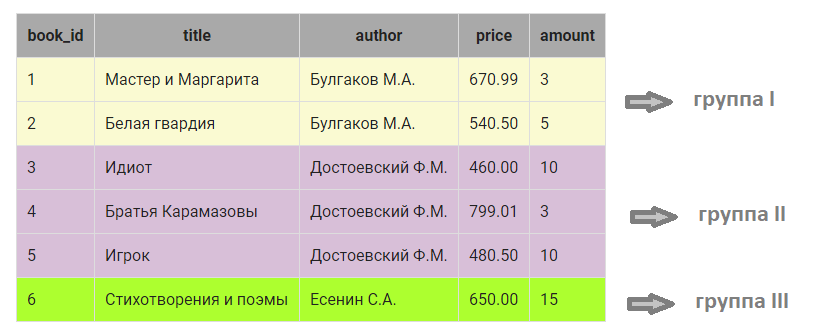

Получили 3 различные группы:

- группа I объединяет две записи, у которых в столбце author значение Булгаков М.А.;
- группа II объединяет три записи, у которых в столбце author значение Достоевский Ф.М.;
- группа III объединяет одну запись, у которой в столбце author значение Есенин С.А.

Вместо каждой группы в результирующий запрос включается  одна запись. Запись как минимум включает значение столбца, по которому осуществляется группировка (в нашем случае это author):

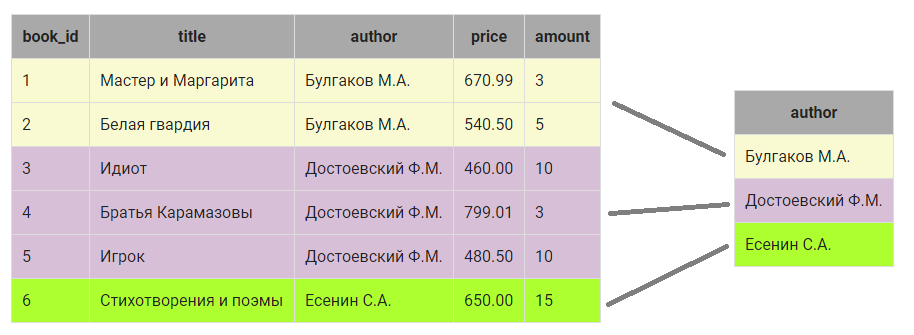

Дальше можно выполнить вычисления над элементами КАЖДОЙ группы в отдельности, например, посчитать общее количество экземпляров книг каждого автора. Для этого используется групповая функция SUM(), а в скобках указывается столбец, по которому нужно выполнить суммирование ( в нашем случае amount):

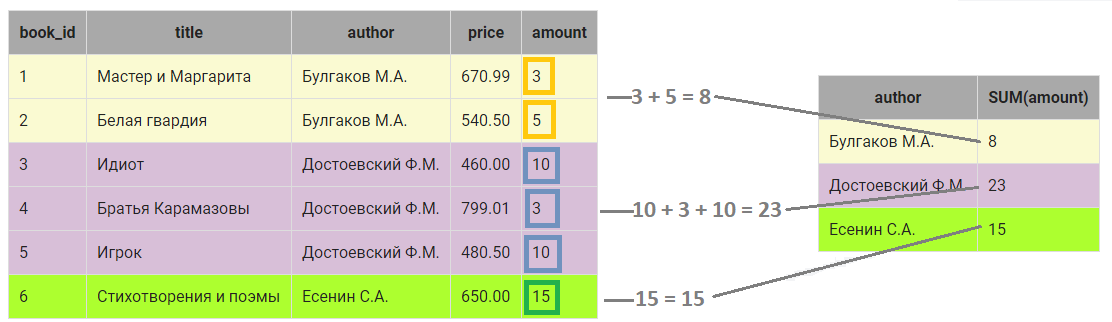

Также можно посчитать, сколько записей относится к группе. Для этого используется функция COUNT(), в скобках можно указать ЛЮБОЙ столбец из группы, если группа не содержит пустых значений (ниже приведен пример, в котором показано, как работает COUNT(), если в группе есть пустые значения):

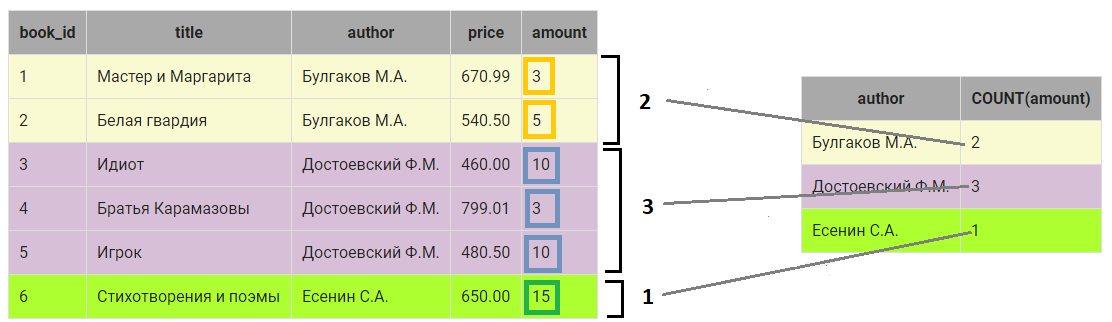

Посчитать, количество различных книг и количество экземпляров книг каждого автора , хранящихся на складе.  Столбцы назвать Автор, Различных_книг и Количество_экземпляров соответственно.

In [101]:
'''
SELECT author AS "Автор",
COUNT(title) AS "Различных_книг",
SUM(amount) AS "Количество_экземпляров"
FROM book
GROUP BY Автор
'''

'\nSELECT author AS "Автор",\nCOUNT(title) AS "Различных_книг",\nSUM(amount) AS "Количество_экземпляров"\nFROM book\nGROUP BY Автор\n'

## Выборка данных, групповые функции MIN, MAX и AVG

К групповым функциям SQL относятся: MIN(), MAX() и AVG(), которые вычисляют минимальное, максимальное и среднее значение элементов столбца, относящихся к группе.

Вывести минимальную цену книги каждого автора

In [102]:
'''
SELECT author, MIN(price) AS min_price
FROM book
GROUP BY author;
'''

'\nSELECT author, MIN(price) AS min_price\nFROM book\nGROUP BY author;\n'

Вывести фамилию и инициалы автора, минимальную, максимальную и среднюю цену книг каждого автора . Вычисляемые столбцы назвать Минимальная_цена, Максимальная_цена и Средняя_цена соответственно.

In [103]:
'''
SELECT author, 
MIN(price) AS Минимальная_цена, 
MAX(price) AS Максимальная_цена,
AVG(price) AS Средняя_цена 
FROM book
GROUP BY author;
'''

'\nSELECT author, \nMIN(price) AS Минимальная_цена, \nMAX(price) AS Максимальная_цена,\nAVG(price) AS Средняя_цена \nFROM book\nGROUP BY author;\n'

## Выборка данных c вычислением, групповые функции

В качестве аргумента групповых функций  SQL может использоваться не только столбец, но и любое допустимое в SQL арифметическое выражение.

Вывести суммарную стоимость книг каждого автора.

In [104]:
'''
SELECT author, SUM(price * amount) AS Стоимость
FROM book
GROUP BY author;
'''

'\nSELECT author, SUM(price * amount) AS Стоимость\nFROM book\nGROUP BY author;\n'

Найти среднюю цену книг каждого автора.

In [105]:
'''
SELECT author, ROUND(AVG(price),2) AS Средняя_цена
FROM book
GROUP BY author;
'''

'\nSELECT author, ROUND(AVG(price),2) AS Средняя_цена\nFROM book\nGROUP BY author;\n'

Для каждого автора вычислить суммарную стоимость книг S (имя столбца Стоимость), а также вычислить налог на добавленную стоимость  для полученных сумм (имя столбца НДС ) , который включен в стоимость и составляет 18% (k=18),  а также стоимость книг  (Стоимость_без_НДС) без него. Значения округлить до двух знаков после запятой. В запросе для расчета НДС(tax)  и Стоимости без НДС(S_without_tax) использовать следующие формулы:

In [106]:
'''
SELECT author, 
ROUND(SUM(price*amount), 2) AS Стоимость,
ROUND(SUM(price*amount) * 0.18 / 1.18, 2) AS НДС,
ROUND(SUM(price*amount) / 1.18, 2) AS Стоимость_без_НДС
FROM book
GROUP BY author;
'''

'\nSELECT author, \nROUND(SUM(price*amount), 2) AS Стоимость,\nROUND(SUM(price*amount) * 0.18 / 1.18, 2) AS НДС,\nROUND(SUM(price*amount) / 1.18, 2) AS Стоимость_без_НДС\nFROM book\nGROUP BY author;\n'

## Вычисления по таблице целиком

Групповые функции позволяют вычислять итоговые значения по всей таблице. Например, можно посчитать общее количество книг на складе, вычислить суммарную стоимость и пр. Для этого после ключевого слова SELECT указывается групповая функция для выражения или имени столбца, а ключевые слова GROUP BY опускаются.

Посчитать общее количество экземпляров книг на складе и их стоимость.

In [108]:
'''
SELECT SUM(amount) AS Количество, SUM(price * amount) AS Стоимость
FROM book;
'''

'\nSELECT SUM(amount) AS Количество, SUM(price * amount) AS Стоимость\nFROM book;\n'

Вывести  цену самой дешевой книги, цену самой дорогой и среднюю цену уникальных книг на складе. Названия столбцов Минимальная_цена, Максимальная_цена, Средняя_цена соответственно. Среднюю цену округлить до двух знаков после запятой.

In [109]:
'''
SELECT 
MIN(price) AS Минимальная_цена, 
MAX(price) AS Максимальная_цена,
ROUND(AVG(price), 2) AS Средняя_цена 
FROM book;
'''

'\nSELECT \nMIN(price) AS Минимальная_цена, \nMAX(price) AS Максимальная_цена,\nROUND(AVG(price), 2) AS Средняя_цена \nFROM book;\n'

## Выборка данных по условию, групповые функции

В запросы с групповыми функциями можно включать условие отбора строк, которое в обычных запросах записывается после WHERE. В запросах с групповыми функциями вместо WHERE используется ключевое слово HAVING , которое размещается после оператора GROUP BY.

Найти минимальную и максимальную цену книг всех авторов, общая стоимость книг которых больше 5000. Результат вывести по убыванию минимальной цены.

In [111]:
'''
SELECT author, MIN(price) AS Минимальная_цена, MAX(price) AS Максимальная_цена
FROM book
GROUP BY author
HAVING SUM(price * amount) > 5000 
ORDER BY Минимальная_цена DESC;
'''

'\nSELECT author, MIN(price) AS Минимальная_цена, MAX(price) AS Максимальная_цена\nFROM book\nGROUP BY author\nHAVING SUM(price * amount) > 5000 \nORDER BY Минимальная_цена DESC;\n'

Вычислить среднюю цену и суммарную стоимость тех книг, количество экземпляров которых принадлежит интервалу от 5 до 14, включительно. Столбцы назвать Средняя_цена и Стоимость, значения округлить до 2-х знаков после запятой.

In [112]:
'''
SELECT 
ROUND(AVG(price), 2) AS Средняя_цена,
ROUND(SUM(price*amount), 2) AS Стоимость
FROM book
WHERE amount BETWEEN 5 AND 14
'''

'\nSELECT \nROUND(AVG(price), 2) AS Средняя_цена,\nROUND(SUM(price*amount), 2) AS Стоимость\nFROM book\nWHERE amount BETWEEN 5 AND 14\n'

## Выборка данных по условию, групповые функции, WHERE и HAVING

WHERE и HAVING могут использоваться в одном запросе. При этом необходимо учитывать порядок выполнения  SQL запроса на выборку на СЕРВЕРЕ:

1) FROM
2) WHERE
3) GROUP BY
4) HAVING
5) SELECT
6) ORDER BY

Сначала определяется таблица, из которой выбираются данные (FROM), затем из этой таблицы отбираются записи в соответствии с условием  WHERE, выбранные данные агрегируются (GROUP BY),  из агрегированных записей выбираются те, которые удовлетворяют условию после HAVING. Потом формируются данные результирующей выборки, как это указано после SELECT ( вычисляются выражения, присваиваются имена и пр. ). Результирующая выборка сортируется, как указано после ORDER BY.

Важно! Порядок ВЫПОЛНЕНИЯ запросов - это не порядок ЗАПИСИ ключевых слов в запросе на выборку. Порядок записи (синтаксис запроса) остается таким же, как рассматривался ранее в курсе. Порядок ВЫПОЛНЕНИЯ  нужен для того, чтобы понять, почему, например, в WHERE нельзя использовать имена выражений из SELECT. Просто SELECT выполняется компилятором позже, чем WHERE, поэтому ему неизвестно, какое там выражение написано.

Вывести максимальную и минимальную цену книг каждого автора, кроме Есенина, количество экземпляров книг которого больше 10. 

In [113]:
'''
SELECT author,
    MIN(price) AS Минимальная_цена,
    MAX(price) AS Максимальная_цена
FROM book
WHERE author <> 'Есенин С.А.'
GROUP BY author
HAVING SUM(amount) > 10;
'''

"\nSELECT author,\n    MIN(price) AS Минимальная_цена,\n    MAX(price) AS Максимальная_цена\nFROM book\nWHERE author <> 'Есенин С.А.'\nGROUP BY author\nHAVING SUM(amount) > 10;\n"

In [114]:
'''
SELECT author,
    MIN(price) AS Минимальная_цена,
    MAX(price) AS Максимальная_цена
FROM book
GROUP BY author
HAVING SUM(amount) > 10 AND author <> 'Есенин С.А.';
'''

"\nSELECT author,\n    MIN(price) AS Минимальная_цена,\n    MAX(price) AS Максимальная_цена\nFROM book\nGROUP BY author\nHAVING SUM(amount) > 10 AND author <> 'Есенин С.А.';\n"

Не смотря на то что результат будет одинаковым, так делать не рекомендуется. «Потому что как написано - запрос сначала выбирает всех авторов, потом выводит данные, рассчитывая минимальное и максимальное значение цены для каждого, и только после всего убирает Есенина. Можно убрать Есенина в данном случае раньше и не использовать ресурсы базы для расчета его минимального и максимального значения, как это сделано в первом варианте. На небольшой базе быстродействия не ощутить, но если выполнять такое на продуктивной, то второй вариант значительно проигрывает...»

Посчитать стоимость всех экземпляров каждого автора без учета книг «Идиот» и «Белая гвардия». В результат включить только тех авторов, у которых суммарная стоимость книг (без учета книг «Идиот» и «Белая гвардия») более 5000 руб. Вычисляемый столбец назвать Стоимость. Результат отсортировать по убыванию стоимости.

In [115]:
'''
SELECT author, SUM(price * amount) AS Стоимость 
FROM book
WHERE title <> "Идиот" AND title <> "Белая гвардия"
GROUP BY author
HAVING Стоимость > 5000
ORDER BY Стоимость DESC
'''

'\nSELECT author, SUM(price * amount) AS Стоимость \nFROM book\nWHERE title <> "Идиот" AND title <> "Белая гвардия"\nGROUP BY author\nHAVING Стоимость > 5000\nORDER BY Стоимость DESC\n'

## Вложенные запросы

SQL позволяет создавать вложенные запросы. Вложенный запрос (подзапрос, внутренний запрос) – это запрос внутри другого запроса SQL.

Вложенный запрос используется для выборки данных, которые будут использоваться в условии отбора записей основного запроса. Его применяют для:

- сравнения выражения с результатом вложенного запроса;
- определения того, включено ли выражение в результаты вложенного запроса;
- проверки того, выбирает ли запрос определенные строки.

Вложенный запрос имеет следующие компоненты:

1) ключевое слово SELECT  после которого указываются имена столбцов или выражения (чаще всего список содержит один элемент) ;
2) ключевое слово FROM и имя таблицы, из которой выбираются данные;
3) необязательное предложение WHERE;
4) необязательное предложение GROUP BY:
5) необязательное предложение HAVING.
 
 Вложенные запросы  могут включаться в WHERE или HAVING так (в квадратных скобках указаны необязательные элементы, через | – один из элементов):

- WHERE | HAVING выражение оператор_сравнения (вложенный запрос);
- WHERE | HAVING выражение, включающее вложенный запрос;
- WHERE | HAVING выражение [NOT] IN (вложенный запрос);
- WHERE | HAVING выражение  оператор_сравнения  ANY | ALL (вложенный запрос).

Также вложенные запросы могут вставляться в основной запрос после ключевого слова SELECT.

Вывести информацию о самых дешевых книгах, хранящихся на складе.

In [116]:
'''
SELECT title, author, price, amount
FROM book
WHERE price = (
         SELECT MIN(price) 
         FROM book
      );
'''

'\nSELECT title, author, price, amount\nFROM book\nWHERE price = (\n         SELECT MIN(price) \n         FROM book\n      );\n'

Вывести информацию (автора, название и цену) о  книгах, цены которых меньше или равны средней цене книг на складе. Информацию вывести в отсортированном по убыванию цены виде. Среднее вычислить как среднее по цене книги.

In [117]:
'''
SELECT author, title, price
FROM book
WHERE price <= (SELECT AVG(price) FROM book)
ORDER BY price DESC
'''

'\nSELECT author, title, price\nFROM book\nWHERE price <= (SELECT AVG(price) FROM book)\nORDER BY price DESC\n'

## Использование вложенного запроса в выражении

Вложенный запрос, возвращающий одно значение, может использоваться в выражениях как обычный операнд, например, к нему можно что-то прибавить, вычесть и пр.

Вывести информацию о книгах, количество экземпляров которых отличается от среднего количества экземпляров книг на складе более чем на 3. То есть нужно вывести и те книги, количество экземпляров которых меньше среднего на 3, или больше среднего на 3.

In [118]:
'''
SELECT title, author, amount 
FROM book
WHERE ABS(amount - (SELECT AVG(amount) FROM book)) >3;
'''

'\nSELECT title, author, amount \nFROM book\nWHERE ABS(amount - (SELECT AVG(amount) FROM book)) >3;\n'

Вывести информацию (автора, название и цену) о тех книгах, цены которых превышают минимальную цену книги на складе не более чем на 150 рублей в отсортированном по возрастанию цены виде.

In [119]:
'''
SELECT author, title, price
FROM book
WHERE price - (SELECT MIN(price) FROM book) <= 150
ORDER BY price ASC
'''

'\nSELECT author, title, price\nFROM book\nWHERE price - (SELECT MIN(price) FROM book) <= 150\nORDER BY price ASC\n'

## Вложенный запрос, оператор IN

Вложенный запрос может возвращать несколько значений одного столбца.  Тогда его можно использовать в разделе WHERE совместно с оператором IN.

WHERE имя_столбца IN (вложенный запрос, возвращающий один столбец)

Оператор IN определяет, совпадает ли значение столбца с одним из значений, содержащихся во вложенном запросе. При этом логическое выражение после WHERE получает значение истина. Оператор NOT IN выполняет обратное действие – выражение истинно, если значение столбца не содержится во вложенном запросе.

Вывести информацию о книгах тех авторов, общее количество экземпляров книг которых не менее 12.

In [ ]:
'''
SELECT title, author, amount, price
FROM book
WHERE author IN (
        SELECT author 
        FROM book 
        GROUP BY author 
        HAVING SUM(amount) >= 12
      );
'''

Вывести информацию (автора, книгу и количество) о тех книгах, количество экземпляров которых в таблице book не дублируется.

In [120]:
'''
SELECT author, title, amount
FROM book
WHERE amount IN (SELECT amount 
                 FROM book
                GROUP BY amount
                 HAVING COUNT(amount) <> 2
                )
'''

'\nSELECT author, title, amount\nFROM book\nWHERE amount IN (SELECT amount \n                 FROM book\n                GROUP BY amount\n                 HAVING COUNT(amount) <> 2\n                )\n'

## Вложенный запрос, операторы ANY и ALL

Вложенный запрос, возвращающий несколько значений одного столбца, можно использовать для отбора записей с помощью операторов ANY и ALL совместно с операциями отношения (=, <>, <=, >=, <, >).

Операторы ANY и ALL используются  в SQL для сравнения некоторого значения с результирующим набором вложенного запроса, состоящим из одного столбца. При этом тип данных столбца, возвращаемого вложенным запросом, должен совпадать с типом данных столбца (или выражения), с которым происходит сравнение.

При использовании оператора ANY в результирующую таблицу будут включены все записи, для которых  выражение со знаком отношения верно хотя бы для одного элемента результирующего запроса. Как работает оператор ANY:

amount > ANY (10, 12) эквивалентно amount > 10

amount < ANY (10, 12) эквивалентно amount < 12

amount = ANY (10, 12) эквивалентно (amount = 10) OR (amount = 12), а также amount IN  (10,12)

amount <> ANY (10, 12) вернет все записи с любым значением amount, включая 10 и 12

При использовании оператора ALL в результирующую таблицу будут включены все записи, для которых  выражение со знаком отношения верно для всех элементов результирующего запроса. Как работает оператор ALL:

amount > ALL (10, 12) эквивалентно amount > 12

amount < ALL (10, 12) эквивалентно amount < 10

amount = ALL (10, 12) не вернет ни одной записи, так как эквивалентно (amount = 10) AND (amount = 12)
amount <> ALL (10, 12) вернет все записи кроме тех,  в которыхamount равно 10 или 12

Важно! Операторы ALL и ANY можно использовать только с вложенными запросами. В примерах выше (10, 12) приводится как результат вложенного запроса просто для того, чтобы показать как эти операторы работают. В запросах так записывать нельзя.

Вывести информацию о тех книгах, количество которых меньше самого маленького среднего количества книг каждого автора.

In [121]:
'''
SELECT title, author, amount, price
FROM book
WHERE amount < ALL (
        SELECT AVG(amount) 
        FROM book 
        GROUP BY author 
      );
'''

'\nSELECT title, author, amount, price\nFROM book\nWHERE amount < ALL (\n        SELECT AVG(amount) \n        FROM book \n        GROUP BY author \n      );\n'

Вывести информацию о тех книгах, количество которых меньше самого большого среднего количества книг каждого автора.

In [122]:
'''
SELECT title, author, amount, price
FROM book
WHERE amount < ANY (
        SELECT AVG(amount) 
        FROM book 
        GROUP BY author 
      );
'''

'\nSELECT title, author, amount, price\nFROM book\nWHERE amount < ANY (\n        SELECT AVG(amount) \n        FROM book \n        GROUP BY author \n      );\n'

Вывести информацию о книгах(автор, название, цена), цена которых меньше самой большой из минимальных цен, вычисленных для каждого автора.

In [ ]:
'''
SELECT author, title, price
FROM book
WHERE price < ANY (SELECT MIN(price) 
              FROM book
              GROUP BY author)
'''

## Вложенный запрос после SELECT

Вложенный запрос может располагаться после ключевого слова SELECT. В этом случае результат выполнения запроса выводится в отдельном столбце результирующей таблицы. При этом результатом запроса может быть только одно значение, тогда оно будет повторяться во всех строках. Также вложенный запрос может использоваться в выражениях.

Вывести информацию о книгах, количество экземпляров которых отличается от среднего количества экземпляров книг на складе более чем на 3,  а также указать среднее значение количества экземпляров книг.

In [123]:
'''
SELECT title, author, amount, 
    (
     SELECT AVG(amount) 
     FROM book
    ) AS Среднее_количество 
FROM book
WHERE abs(amount - (SELECT AVG(amount) FROM book)) >3;
'''

'\nSELECT title, author, amount, \n    (\n     SELECT AVG(amount) \n     FROM book\n    ) AS Среднее_количество \nFROM book\nWHERE abs(amount - (SELECT AVG(amount) FROM book)) >3;\n'

Посчитать сколько и каких экземпляров книг нужно заказать поставщикам, чтобы на складе стало одинаковое количество экземпляров каждой книги, равное значению самого большего количества экземпляров одной книги на складе. Вывести название книги, ее автора, текущее количество экземпляров на складе и количество заказываемых экземпляров книг. Последнему столбцу присвоить имя Заказ. В результат не включать книги, которые заказывать не нужно.

In [124]:
'''
SELECT title, author, amount,
(SELECT MAX(amount) FROM book) - amount AS Заказ
FROM book
WHERE amount <> (SELECT MAX(amount) FROM book)
'''

'\nSELECT title, author, amount,\n(SELECT MAX(amount) FROM book) - amount AS Заказ\nFROM book\nWHERE amount <> (SELECT MAX(amount) FROM book)\n'

## Создание пустой таблицы

In [125]:
'''
CREATE TABLE IF NOT EXISTS supply (
    supply_id INT PRIMARY KEY AUTO_INCREMENT,
    title VARCHAR(50),
    author VARCHAR(30), 
    price DECIMAL(8, 2),
    amount INT
)
'''

'\nCREATE TABLE IF NOT EXISTS supply (\n    supply_id INT PRIMARY KEY AUTO_INCREMENT,\n    title VARCHAR(50),\n    author VARCHAR(30), \n    price DECIMAL(8, 2),\n    amount INT\n)\n'

## Добавление записей в таблицу

Допускается вставка нескольких записей одновременно, для этого используется SQL запрос следующего вида:

INSERT INTO имя_таблицы(столбец_1, столбец_2, ..., столбец_N)

VALUES

    (значение_1_1, значение_1_2, ..., значение_1_N),

    (значение_2_1, значение_2_2, ..., значение_2_N),

    ...
    
    (значение_M_1, значение_M_2, ..., значение_M_N);
    
Например, чтобы добавить в таблицу book две новые записи используется запрос:

In [126]:
'''
INSERT INTO book (title, author, price, amount) 
VALUES 
    ('Война и мир','Толстой Л.Н.', 1070.20, 2),
    ('Анна Каренина', 'Толстой Л.Н.', 599.90, 3);
'''

"\nINSERT INTO book (title, author, price, amount) \nVALUES \n    ('Война и мир','Толстой Л.Н.', 1070.20, 2),\n    ('Анна Каренина', 'Толстой Л.Н.', 599.90, 3);\n"

Занесите в таблицу supply четыре записи, чтобы получилась следующая таблица:

In [127]:
'''
INSERT INTO supply (supply_id, title, author, price, amount) 
VALUES 
    (1,	"Лирика", "Пастернак Б.Л.", 518.99, 2),
    (2,	"Черный человек", "Есенин С.А.", 570.20, 6),
    (3,	"Белая гвардия", "Булгаков М.А.", 540.50, 7),
    (4,	"Идиот", "Достоевский Ф.М.", 360.80, 3)
'''

'\nINSERT INTO supply (supply_id, title, author, price, amount) \nVALUES \n    (1,\t"Лирика", "Пастернак Б.Л.", 518.99, 2),\n    (2,\t"Черный человек", "Есенин С.А.", 570.20, 6),\n    (3,\t"Белая гвардия", "Булгаков М.А.", 540.50, 7),\n    (4,\t"Идиот", "Достоевский Ф.М.", 360.80, 3)\n'

## Добавление записей из другой таблицы

С помощью запроса на добавление можно не только добавить в таблицу конкретные значения (список VALUES), но и записи из другой таблицы, отобранные с помощью запроса на выборку.  В этом случае вместо раздела VALUES записывается запрос на выборку, начинающийся с SELECT.  В нем можно использовать WHERE, GROUP BY, ORDER BY.

Правила соответствия между полями таблицы и вставляемыми значениями из запроса:

- количество полей в таблице и количество полей в запросе должны совпадать;
- должно существовать прямое соответствие между позицией одного и того же элемента в обоих списках, поэтому первый столбец запроса должен относиться к первому столбцу в списке столбцов таблицы, второй – ко второму столбцу и т.д.
- типы столбцов запроса должны быть совместимы с типами данных соответствующих столбцов таблицы ( целое число можно занести в поле типа DECIMAL, обратная операция – недопустима).

Занести все книги из таблицы supply в таблицу book.

In [1]:
'''
INSERT INTO book (title, author, price, amount) 
SELECT title, author, price, amount 
FROM supply;
'''

'\nINSERT INTO book (title, author, price, amount) \nSELECT title, author, price, amount \nFROM supply;\n'

Добавить из таблицы supply в таблицу book, все книги, кроме книг, написанных Булгаковым М.А. и Достоевским Ф.М.

In [2]:
'''
INSERT INTO book (title, author, price, amount)
SELECT title, author, price, amount
FROM supply
WHERE author NOT IN ("Булгаков М.А.", "Достоевский Ф.М.")
'''

'\nINSERT INTO book (title, author, price, amount)\nSELECT title, author, price, amount\nFROM supply\nWHERE author NOT IN ("Булгаков М.А.", "Достоевский Ф.М.")\n'

## Добавление записей, вложенные запросы

В запросах на добавление можно использовать вложенные запросы.

Занести из таблицы supply в таблицу book только те книги, названия которых отсутствуют в таблице book.

In [3]:
'''
INSERT INTO book (title, author, price, amount) 
SELECT title, author, price, amount 
FROM supply
WHERE title NOT IN (
        SELECT title 
        FROM book
      );
'''

'\nINSERT INTO book (title, author, price, amount) \nSELECT title, author, price, amount \nFROM supply\nWHERE title NOT IN (\n        SELECT title \n        FROM book\n      );\n'

Занести из таблицы supply в таблицу book только те книги, авторов которых нет в  book.

In [4]:
'''
INSERT INTO book (title, author, price, amount) 
SELECT title, author, price, amount 
FROM supply
WHERE author NOT IN (
        SELECT author 
        FROM book
      );
'''

'\nINSERT INTO book (title, author, price, amount) \nSELECT title, author, price, amount \nFROM supply\nWHERE author NOT IN (\n        SELECT author \n        FROM book\n      );\n'

## Запросы на обновление

Под обновлением данных подразумевается изменение значений в существующих записях таблицы. При этом возможно как изменение значений полей в группе строк (даже всех строк таблицы), так и правка значения поля отдельной строки.

Изменение записей в таблице реализуется с помощью запроса UPDATE. Простейший запрос на  обновление выглядит так:

UPDATE 'таблица' SET 'поле' = 'выражение'

где 
- таблица – имя таблицы, в которой будут проводиться изменения;
- поле – поле таблицы, в которое будет внесено изменение;
- выражение – выражение,  значение которого будет занесено в поле.

С помощью запросов на обновление можно изменять не все записи в таблице (как в предыдущем запросе), а только часть из них. Для этого в запрос включается ключевое слово WHERE, после которого указывается условие отбора строк для изменения.

Уменьшить на 30% цену книг в таблице book.

In [5]:
'''
UPDATE book 
SET price = 0.7 * price;
'''

'\nUPDATE book \nSET price = 0.7 * price;\n'

Уменьшить на 10% цену тех книг в таблице book, количество которых принадлежит интервалу от 5 до 10, включая границы.

In [6]:
'''
UPDATE book 
SET price = price * 0.9
WHERE amount BETWEEN 5 AND 10
'''

'\nUPDATE book \nSET price = price * 0.9\nWHERE amount BETWEEN 5 AND 10\n'

## Запросы на обновление нескольких столбцов

Запросом UPDATE можно обновлять значения нескольких столбцов одновременно. В этом случае простейший запрос будет выглядеть так:

UPDATE таблица SET поле1 = выражение1, поле2 = выражение2

В столбце buy покупатель указывает количество книг, которые он хочет приобрести. Для каждой книги, выбранной покупателем, необходимо уменьшить ее количество на складе на указанное в столбцеbuy количество, а в столбец buy занести 0.

In [7]:
'''
UPDATE book 
SET amount = amount - buy,
    buy = 0;
'''

'\nUPDATE book \nSET amount = amount - buy,\n    buy = 0;\n'

В таблице book необходимо скорректировать значение для покупателя в столбце buy таким образом, чтобы оно не превышало количество экземпляров книг, указанных в столбце amount. А цену тех книг, которые покупатель не заказывал, снизить на 10%.

In [8]:
'''
UPDATE book
SET 
buy = IF(buy > amount, amount, buy), 
price = IF(buy = 0, price * 0.9, price)
'''

'\nUPDATE book\nSET \nbuy = IF(buy > amount, amount, buy), \nprice = IF(buy = 0, price * 0.9, price)\n'

## Запросы на обновление нескольких таблиц

В запросах на обновление можно использовать несколько таблиц, но тогда

- для столбцов, имеющих одинаковые имена, необходимо указывать имя таблицы, к которой они относятся, например, book.price – столбец price из таблицы book, supply.price – столбец price из таблицы supply;
- все таблицы, используемые в запросе, нужно перечислить после ключевого слова UPDATE;
- в запросе обязательно условие WHERE, в котором указывается условие при котором обновляются данные.

Если в таблице supply  есть те же книги, что и в таблице book, добавлять эти книги в таблицу book не имеет смысла. Необходимо увеличить их количество на значение столбца amountтаблицы supply.

In [9]:
'''
UPDATE book, supply 
SET book.amount = book.amount + supply.amount
WHERE book.title = supply.title AND book.author = supply.author;
'''

'\nUPDATE book, supply \nSET book.amount = book.amount + supply.amount\nWHERE book.title = supply.title AND book.author = supply.author;\n'

Для тех книг в таблице book , которые есть в таблице supply, не только увеличить их количество в таблице book ( увеличить их количество на значение столбца amountтаблицы supply), но и пересчитать их цену (для каждой книги найти сумму цен из таблиц book и supply и разделить на 2).

In [10]:
'''
UPDATE book, supply
SET 
book.amount = book.amount + supply.amount,
book.price = (book.price + supply.price) / 2
WHERE book.title = supply.title AND book.author = supply.author
'''

'\nUPDATE book, supply\nSET \nbook.amount = book.amount + supply.amount,\nbook.price = (book.price + supply.price) / 2\nWHERE book.title = supply.title AND book.author = supply.author\n'

## Запросы на удаление

Запросы корректировки данных позволяют удалить одну или несколько записей из  таблицы. Простейший запрос на удаление имеет вид:

DELETE FROM 'таблица';

Этот запрос удаляет все записи из указанной после FROM таблицы.

После того, как информация о книгах из таблицы supply перенесена в book , необходимо очистить таблицу  supply.

In [11]:
'''
DELETE FROM supply
'''

'\nDELETE FROM supply\n'

Запрос на удаления позволяет удалить не все записи таблицы, а только те, которые удовлетворяют условию, указанному после ключевого слова WHERE:

DELETE FROM 'таблица'
WHERE 'условие';

Удалить из таблицы supply все книги, названия которых есть в таблице book.

In [12]:
'''
DELETE FROM supply 
WHERE title IN (
        SELECT title 
        FROM book
      );
'''

'\nDELETE FROM supply \nWHERE title IN (\n        SELECT title \n        FROM book\n      );\n'

Удалить из таблицы supply книги тех авторов, общее количество экземпляров книг которых в таблице book превышает 10.

In [14]:
'''
DELETE FROM supply
WHERE author IN (SELECT author FROM book WHERE amount >= 10);
'''

'\nDELETE FROM supply\nWHERE author IN (SELECT author FROM book WHERE amount >= 10);\n'

## Запросы на создание таблицы

Новая таблица может быть создана на основе данных из другой таблицы. Для этого используется запрос SELECT, результирующая таблица которого и будет новой таблицей базы данных. При этом имена столбцов запроса становятся именами столбцов новой таблицы. Запрос на создание новой таблицы имеет вид:

CREATE TABLE имя_таблицы AS SELECT ...

Создать таблицу заказ (ordering), куда включить авторов и названия тех книг, количество экземпляров которых в таблице book меньше 4. Для всех книг указать одинаковое количество экземпляров 5.

In [15]:
'''
CREATE TABLE ordering AS
SELECT author, title, 5 AS amount
FROM book
WHERE amount < 4;
'''

'\nCREATE TABLE ordering AS\nSELECT author, title, 5 AS amount\nFROM book\nWHERE amount < 4;\n'

При создании таблицы можно использовать вложенные запросы как после SELECT, так и после WHERE.

Создать таблицу заказ (ordering), куда включить авторов и названия тех книг, количество экземпляров которых в таблице book меньше 4. Для всех книг указать одинаковое значение - среднее количество экземпляров книг в таблице book.

In [16]:
'''
CREATE TABLE ordering AS
SELECT author, title, 
   (
    SELECT ROUND(AVG(amount)) 
    FROM book
   ) AS amount
FROM book
WHERE amount < 4;
'''

'\nCREATE TABLE ordering AS\nSELECT author, title, \n   (\n    SELECT ROUND(AVG(amount)) \n    FROM book\n   ) AS amount\nFROM book\nWHERE amount < 4;\n'

Создать таблицу заказ (ordering), куда включить авторов и названия тех книг, количество экземпляров которых в таблице book меньше среднего количества экземпляров книг в таблице book. В таблицу включить столбец   amount, в котором для всех книг указать одинаковое значение - среднее количество экземпляров книг в таблице book.

In [17]:
'''
CREATE TABLE ordering AS
SELECT author, title, 
(SELECT ROUND(AVG(book.amount)) FROM book) AS amount
FROM book
WHERE amount < (SELECT AVG(book.amount) FROM book);
'''

'\nCREATE TABLE ordering AS\nSELECT author, title, \n(SELECT ROUND(AVG(book.amount)) FROM book) AS amount\nFROM book\nWHERE amount < (SELECT AVG(book.amount) FROM book);\n'

## Оператор LIMIT

Для ограничения вывода записей в SQL используется оператор LIMIT , после которого указывается количество строк.  Результирующая таблица будет иметь количество строк не более указанного после LIMIT. LIMIT размещается после раздела ORDER BY.

Как правило, этот оператор используется, чтобы отобрать заданное количество отсортированных строк результата запроса. 

Важно. Оператор LIMIT нужно использовать очень осторожно. Например, если бы в таблице trip было несколько командировок с одинаковой датой начала, этот запрос работал бы НЕВЕРНО. Это связано с тем, что заранее не известно точное значение таких командировок.

Вывести информацию о первой  командировке из таблицы trip. "Первой" считать командировку с самой ранней датой начала.

In [21]:
'''
SELECT *
FROM trip
ORDER BY  date_first
LIMIT 1;
'''

'\nSELECT *\nFROM trip\nORDER BY  date_first\nLIMIT 1;\n'

Вывести два города, в которых чаще всего были в командировках сотрудники. Вычисляемый столбец назвать Количество.

In [22]:
'''
SELECT city, COUNT(city) AS Количество FROM trip
GROUP BY city
ORDER BY Количество DESC
LIMIT 2
'''

'\nSELECT city, COUNT(city) AS Количество FROM trip\nGROUP BY city\nORDER BY Количество DESC\nLIMIT 2\n'

Вывести информацию о командировках во все города кроме Москвы и Санкт-Петербурга (фамилии и инициалы сотрудников, город ,  длительность командировки в днях, при этом первый и последний день относится к периоду командировки). Последний столбец назвать Длительность. Информацию вывести в упорядоченном по убыванию длительности поездки, а потом по убыванию названий городов (в обратном алфавитном порядке).

Немного теории

Для вычитания двух дат используется функция DATEDIFF(дата_1, дата_2), результатом которой является количество дней между дата_1 и дата_2. Например,

DATEDIFF('2020-04-01', '2020-03-28')=4

DATEDIFF('2020-05-09','2020-05-01')=8

DATEDIFF(date_last, date_first)

Вывести информацию о командировках во все города кроме Москвы и Санкт-Петербурга (фамилии и инициалы сотрудников, город ,  длительность командировки в днях, при этом первый и последний день относится к периоду командировки). Последний столбец назвать Длительность. Информацию вывести в упорядоченном по убыванию длительности поездки, а потом по убыванию названий городов (в обратном алфавитном порядке).

In [23]:
'''
SELECT name, city, DATEDIFF(date_last, date_first) + 1 AS Длительность
FROM trip
WHERE city NOT IN ("Москва", "Санкт-Петербург")
ORDER BY Длительность DESC, city DESC
'''

'\nSELECT name, city, DATEDIFF(date_last, date_first) + 1 AS Длительность\nFROM trip\nWHERE city NOT IN ("Москва", "Санкт-Петербург")\nORDER BY Длительность DESC, city DESC\n'

Вывести информацию о командировках сотрудника(ов), которые были самыми короткими по времени. В результат включить столбцы name, city, date_first, date_last.

In [ ]:
'''
SELECT name, city, date_first, date_last FROM trip
WHERE DATEDIFF(date_last, date_first) = (SELECT MIN(DATEDIFF(date_last, date_first)) 
FROM trip)
'''

Вывести информацию о командировках, начало и конец которых относятся к одному месяцу (год может быть любой). В результат включить столбцы name, city, date_first, date_last. Строки отсортировать сначала  в алфавитном порядке по названию города, а затем по фамилии сотрудника .

Немного теории

Для того, чтобы выделить номер месяца из даты используется функция MONTH(дата).

Например, MONTH('2020-04-12') = 4.

Если определяется месяц для  значений столбца date_first, то используется запись MONTH(date_first)

In [ ]:
'''
SELECT name, city, date_first, date_last FROM trip
WHERE MONTH(date_first) = MONTH(date_last)
ORDER BY city ASC, name
'''

Вывести название месяца и количество командировок для каждого месяца. Считаем, что командировка относится к некоторому месяцу, если она началась в этом месяце. Информацию вывести сначала в отсортированном по убыванию количества, а потом в алфавитном порядке по названию месяца виде. Название столбцов – Месяц и Количество.

Немного теории

- Для того, чтобы выделить название месяца из даты используется функция MONTHNAME(дата), которая возвращает название месяца на английском языке для указанной даты. Например, MONTHNAME('2020-04-12')='April'.
- Если группировка осуществляется по вычисляемому столбцу (в данном случае «вычисляется» название месяца), то после GROUP BYможно указать как вычисляемое выражение, так и имя столбца, заданное с помощью AS. Важно отметить, что последний вариант (указать имя столбца)  нарушает стандарт по порядку выполнения запросов, но иногда может встречаться на реальных платформах.

In [ ]:
'''
SELECT MONTHNAME(date_first) AS Месяц, COUNT(monthname(date_first)) AS Количество 
FROM trip
GROUP BY Месяц 
ORDER BY Количество desc, Месяц
'''

Вывести сумму суточных (произведение количества дней командировки и размера суточных) для командировок, первый день которых пришелся на февраль или март 2020 года. Значение суточных для каждой командировки занесено в столбец per_diem. Вывести фамилию и инициалы сотрудника, город, первый день командировки и сумму суточных. Последний столбец назвать Сумма. Информацию отсортировать сначала  в алфавитном порядке по фамилиям сотрудников, а затем по убыванию суммы суточных.

В SQL есть функции, которые позволяют выделить часть даты: день(DAY()), месяц (MONTH()), год(YEAR()) . Например:

- DAY('2020-02-01') = 1
- MONTH('2020-02-01') = 2
- YEAR('2020-02-01') = 2020

In [24]:
'''
SELECT name, city, date_first, per_diem*(DATEDIFF(date_last, date_first)+1) AS Сумма 
FROM trip
WHERE YEAR(date_first) = 2020 AND MONTH(date_first) IN (2, 3)
ORDER BY name ASC, Сумма DESC
'''

'\nSELECT name, city, date_first, per_diem*(DATEDIFF(date_last, date_first)+1) AS Сумма \nFROM trip\nWHERE YEAR(date_first) = 2020 AND MONTH(date_first) IN (2, 3)\nORDER BY name ASC, Сумма DESC\n'

Вывести фамилию с инициалами и общую сумму суточных, полученных за все командировки для тех сотрудников, которые были в командировках больше чем 3 раза, в отсортированном по убыванию сумм суточных виде. Последний столбец назвать Сумма.

In [ ]:
'''
SELECT name, SUM(per_diem*(DATEDIFF(date_last, date_first)+1)) AS Сумма 
FROM trip
WHERE name in (SELECT name FROM trip GROUP BY name HAVING COUNT(name)>3)
GROUP BY name
ORDER BY Сумма DESC
'''

## Использование временного имени таблицы (алиаса)

Чтобы не писать название таблицы каждый раз, удобно использовать алиасы.

Алиас, это псевдоним, который мы присваивали столбцам после ключевого слова AS(шаг).  Алиасы так же можно использовать и для таблиц. Это становится актуальным, при увеличении числа используемых таблиц, их иногда может быть и 5 и 10 и более. Псевдонимы помогают сделать запрос чище и читабельнее.

Для присваивания псевдонима существует 2 варианта: 

- с использованием ключевого слова AS 

FROM fine AS f, traffic_violation AS tv

- а так же и без него

FROM fine f, traffic_violation tv

После присвоения таблице алиаса, он используется во всех разделах запроса, в котором алиас задан. Например:

WHERE f.violation = tv.violation

Для тех, кто уже оплатил штраф, вывести информацию о том, изменялась ли стандартная сумма штрафа.

In [26]:
'''
SELECT  f.name, f.number_plate, f.violation, 
   if(
    f.sum_fine = tv.sum_fine, "Стандартная сумма штрафа", 
    if(
      f.sum_fine < tv.sum_fine, "Уменьшенная сумма штрафа", "Увеличенная сумма штрафа"
    )
  ) AS description               
FROM  fine f, traffic_violation tv
WHERE tv.violation = f.violation and f.sum_fine IS NOT Null;
'''

'\nSELECT  f.name, f.number_plate, f.violation, \n   if(\n    f.sum_fine = tv.sum_fine, "Стандартная сумма штрафа", \n    if(\n      f.sum_fine < tv.sum_fine, "Уменьшенная сумма штрафа", "Увеличенная сумма штрафа"\n    )\n  ) AS description               \nFROM  fine f, traffic_violation tv\nWHERE tv.violation = f.violation and f.sum_fine IS NOT Null;\n'

Занести в таблицу fine суммы штрафов, которые должен оплатить водитель, в соответствии с данными из таблицы traffic_violation. При этом суммы заносить только в пустые поля столбца  sum_fine.

Таблица traffic_violationсоздана и заполнена.

Важно! Сравнение значения столбца с пустым значением осуществляется с помощью оператора IS NULL

In [27]:
'''
UPDATE fine AS f, traffic_violation as tv
SET f.sum_fine = tv.sum_fine
WHERE f.violation = tv.violation AND f.sum_fine IS NULL;
'''

'\nUPDATE fine AS f, traffic_violation as tv\nSET f.sum_fine = tv.sum_fine\nWHERE f.violation = tv.violation AND f.sum_fine IS NULL;\n'

## Группировка данных по нескольким столбцам

В разделе GROUP BY можно указывать несколько столбцов, разделяя их запятыми. Тогда к одной группе будут относиться записи, у которых значения столбцов, входящих в группу, равны. Рассмотрим группировку по нескольким столбцам на примере следующего запроса:

SELECT name, number_plate, violation, count(*)

FROM fine

GROUP BY name, number_plate, violation;

1. Сначала записи таблицы  fine разделяются на группы. В каждую группу включаются строки, у которых равны значения в столбцах name, number_plate и violation  соответственно. Получается 6 групп. 

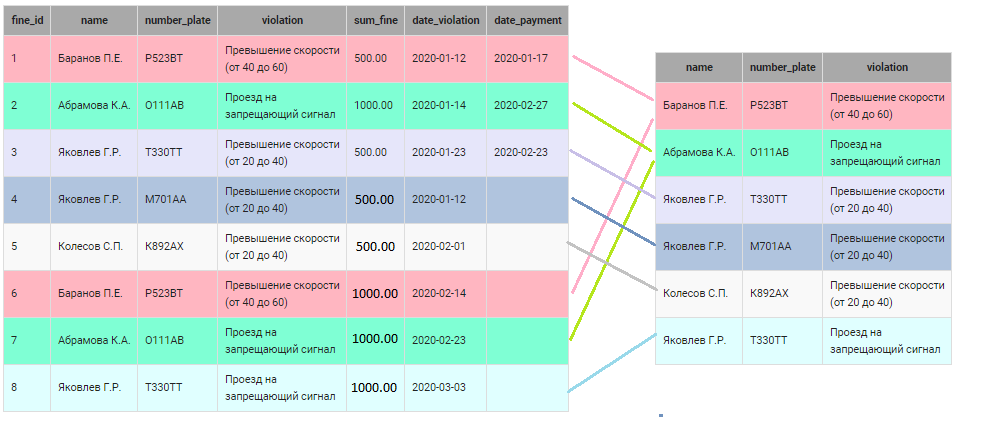

2. Затем вычисляется функция count(*), которая определяет количество записей в каждой группе. Получается, что к первым двум группам относятся по две записи, ко всем остальным - по одной.

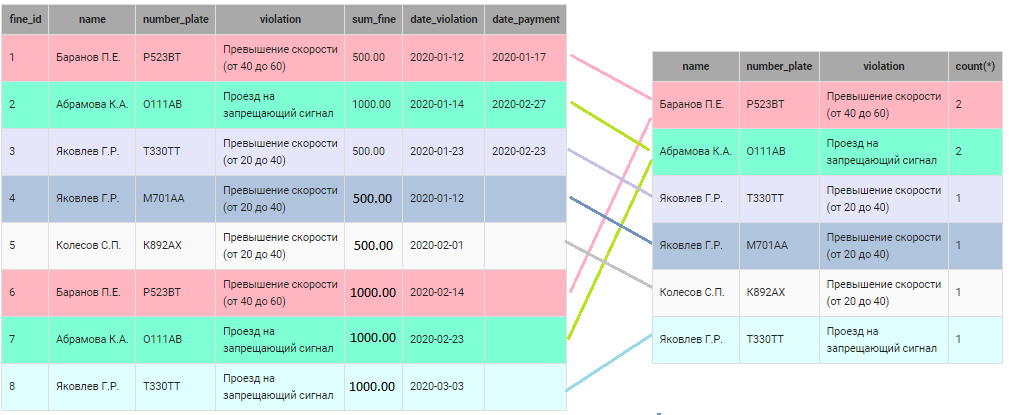

Важно! В разделе GROUP BY нужно перечислять все НЕАГРЕГИРОВАННЫЕ столбцы (к которым не применяются групповые функции) из SELECT.

Вывести фамилию, номер машины и нарушение только для тех водителей, которые на одной машине нарушили одно и то же правило   два и более раз. При этом учитывать все нарушения, независимо от того оплачены они или нет. Информацию отсортировать в алфавитном порядке, сначала по фамилии водителя, потом по номеру машины и, наконец, по нарушению.

In [1]:
'''
SELECT name, number_plate, violation
FROM fine AS f
GROUP BY name, number_plate, violation
HAVING COUNT(violation) >= 2
ORDER BY name ASC
'''

'\nSELECT name, number_plate, violation\nFROM fine AS f\nGROUP BY name, number_plate, violation\nHAVING COUNT(violation) >= 2\nORDER BY name ASC\n'

В таблице fine увеличить в два раза сумму неоплаченных штрафов для отобранных на предыдущем шаге записей. 

In [2]:
'''
UPDATE fine AS f,
       (SELECT name, number_plate, violation
          FROM fine
         GROUP BY name, number_plate, violation
        HAVING count(*) > 1
        ) AS q
   SET f.sum_fine = f.sum_fine * 2
 WHERE f.date_payment IS NULL AND
       f.name = q.name AND
       f.number_plate = q.number_plate AND
       f.violation = q.violation;
 
SELECT * FROM fine;
'''

'\nUPDATE fine AS f,\n       (SELECT name, number_plate, violation\n          FROM fine\n         GROUP BY name, number_plate, violation\n        HAVING count(*) > 1\n        ) AS q\n   SET f.sum_fine = f.sum_fine * 2\n WHERE f.date_payment IS NULL AND\n       f.name = q.name AND\n       f.number_plate = q.number_plate AND\n       f.violation = q.violation;\n \nSELECT * FROM fine;\n'

Водители оплачивают свои штрафы. В таблице payment занесены даты их оплаты:

Необходимо:

- в таблицу fine занести дату оплаты соответствующего штрафа из таблицы payment; 
- уменьшить начисленный штраф в таблице fine в два раза  (только для тех штрафов, информация о которых занесена в таблицу payment) , если оплата произведена не позднее 20 дней со дня нарушения.

In [ ]:
'''
UPDATE 
fine AS f, payment AS p
SET 
f.date_payment = p.date_payment,
f.sum_fine = IF(DATEDIFF(p.date_payment, p.date_violation) <= 20, f.sum_fine / 2, f.sum_fine)
WHERE 
f.name = p.name AND 
f.number_plate = p.number_plate AND 
f.violation = p.violation AND 
f.date_violation = p.date_violation AND 
f.date_payment IS null;
    
SELECT * FROM fine;
'''

Создать новую таблицу back_payment, куда внести информацию о неоплаченных штрафах (Фамилию и инициалы водителя, номер машины, нарушение, сумму штрафа  и  дату нарушения) из таблицы fine.

In [3]:
'''
CREATE TABLE back_payment 
SELECT name, number_plate, violation, sum_fine, date_violation FROM fine
WHERE date_payment IS Null;
'''

'\nCREATE TABLE back_payment \nSELECT name, number_plate, violation, sum_fine, date_violation FROM fine\nWHERE date_payment IS Null;\n'

Удалить из таблицы fine информацию о нарушениях, совершенных раньше 1 февраля 2020 года.

In [4]:
'''
DELETE FROM fine
WHERE name IN (SELECT name 
              GROUP BY name
              HAVING DATEDIFF('2020-02-01', date_violation) > 0);
'''

"\nDELETE FROM fine\nWHERE name IN (SELECT name \n              GROUP BY name\n              HAVING DATEDIFF('2020-02-01', date_violation) > 0);\n"